# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [229]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err


def eval_GD(X, y, iterations_count, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    iterations = []
    errors = []
    n = X.shape[0]
    for i in range(1, iterations_count + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
        iterations.append(i)
        errors.append(err)
    return w, iterations, errors

def eval_SGD(X, y, iterations_count, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) 
    n = X.shape[0]
    iterations = []
    errors = []
    for i in range(1, iterations_count + 1):
        err = calc_mse(y, np.dot(X, w))
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        iterations.append(i)
        errors.append(err)
    return w, iterations, errors

def eval_model_reg1(X, y, iterations, eta=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)                 
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) +  lambda_ * d_abs(w))
    return w

def d_abs(x):
    mask_1 = (x>=0)*1.0
    mask_2 = (x<0)*-1.0
    return mask_1 + mask_2
    
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
    return w


## Домашние задания

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [163]:
X, y, coef = datasets.make_regression(n_samples=10000, 
                                      n_features=5, 
                                      n_informative=5, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [164]:
print(f"coef: {coef}")

coef: [91.40492702 94.77549261  0.27705054 38.25226374  5.35592483]


### Градиентный спуск

In [165]:
iterations_count = 30000

In [166]:
%%time

w_GD, iterations_GD, errors_GD = eval_GD(X, y, iterations_count)
print(f"w: {w_GD}")

w: [91.20734024 94.5400786   0.29358928 38.17150527  5.3560458 ]
Wall time: 8.76 s


### Стохастический градиентный спуск

In [167]:
%%time

w_SGD, iterations_SGD, errors_SGD = eval_SGD(X, y, iterations_count)
print(f"w: {w_SGD}")

w: [91.15313909 94.52092333  0.23338863 38.21980168  5.29991964]
Wall time: 5.82 s


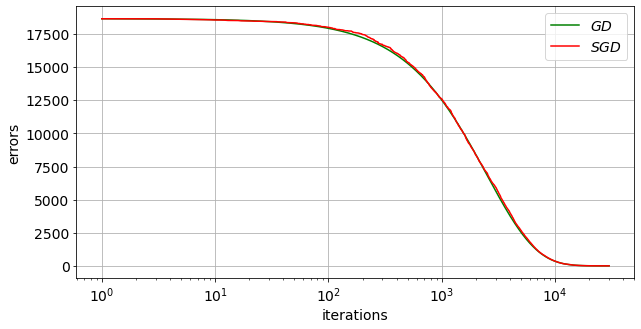

In [168]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(iterations_GD, errors_GD, 'g-', label=r'$GD$')
plt.plot(iterations_SGD, errors_SGD, 'r-', label=r'$SGD$')
plt.xlabel('iterations')
plt.ylabel('errors')
plt.grid()
plt.legend();

**Вывод:** Судя по графику графики MSE у градиентного спуска и стохастического градиентного спуска очень схожи, нашел отличия только в скорости обучения. Скорость обучения стохастического градиентого спуска выше чем у градиенного спуска.

2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически). 

#### Aлгоритм градиентного спуска c L1 регуляризацией

In [243]:
iterations_count = 5000

In [244]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg1(X, y, iterations=iterations_count, eta=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)

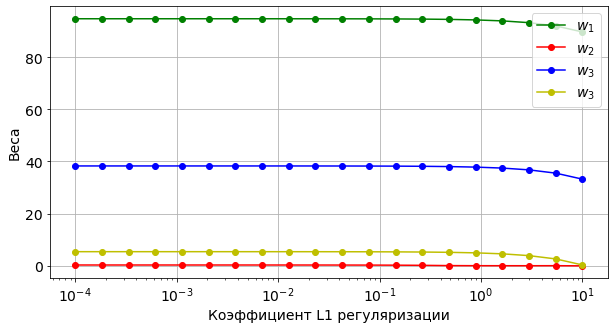

In [245]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.plot(l_list, weights[:, 4], 'yo-', label=r'$w_3$')
plt.xlabel('Коэффициент L1 регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend();

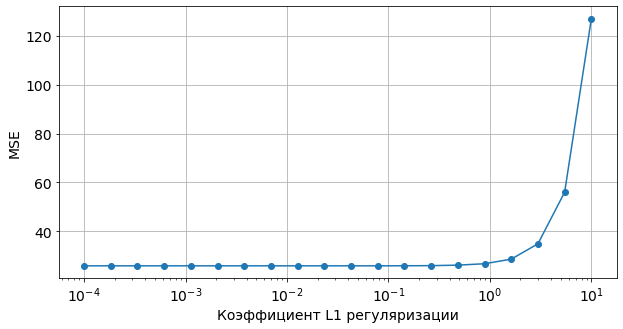

In [246]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, errors, 'o-')
plt.xlabel('Коэффициент L1 регуляризации')
plt.ylabel('MSE')
plt.grid();

#### Aлгоритм градиентного спуска c L2 регуляризацией

In [247]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(X, y, iterations=iterations_count, eta=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)

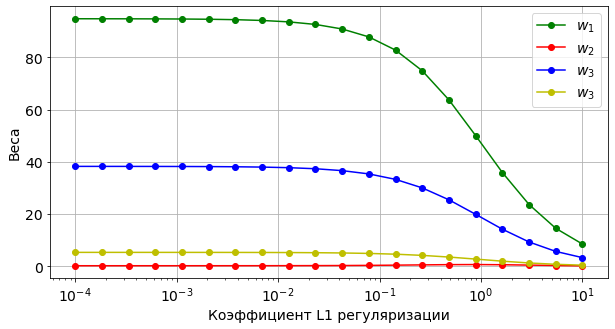

In [248]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.plot(l_list, weights[:, 4], 'yo-', label=r'$w_3$')
plt.xlabel('Коэффициент L1 регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend();

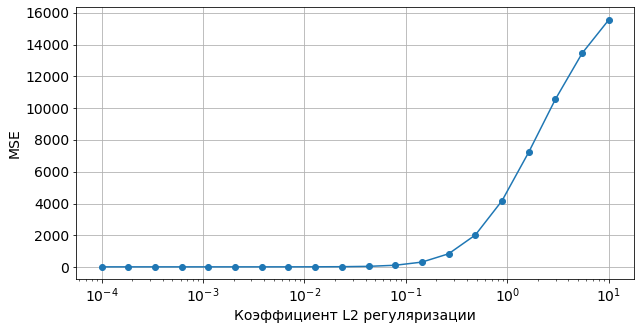

In [249]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, errors, 'o-')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('MSE')
plt.grid();